# Seaborn

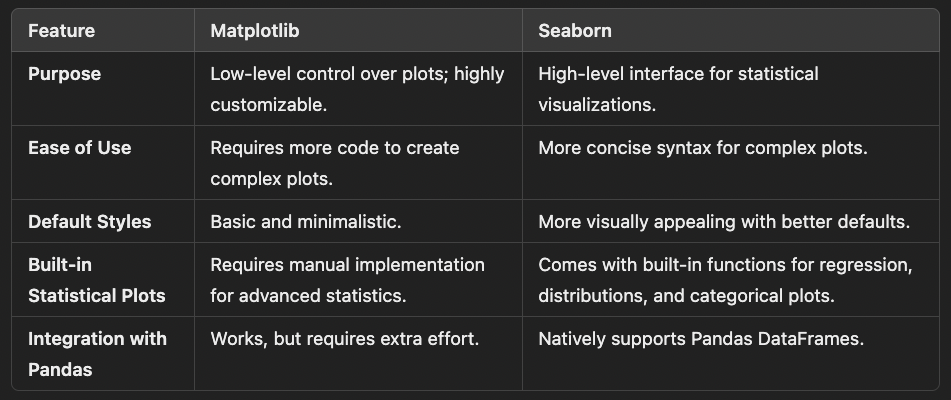

Even though Seaborn provides high-level plotting functions, it is built on top of Matplotlib. This means that Seaborn internally uses Matplotlib to create plots, but it simplifies the process by handling styles, colors, and layouts for you.
Why Do We Still Use plt with Seaborn?

- Matplotlib Handles the Figure and Axes
        Seaborn creates plots on Matplotlib’s figure (`plt.figure()`) and axes (`plt.gca()`).
        Without `plt.show()`, the plot may not display properly in some environments (e.g., scripts, Jupyter notebooks).

- Adding Customizations Beyond Seaborn
        Seaborn focuses on statistical plots but doesn’t control the full figure layout.
        You still use `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to modify aspects that Seaborn doesn’t manage directly.

- Multiple Plots in One Figure
        If you want multiple plots together (e.g., subplots), you need Matplotlib’s `plt.subplots()`

## Countplot

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [8]:
#titanic["pclass"] = titanic["pclass"].astype(str)

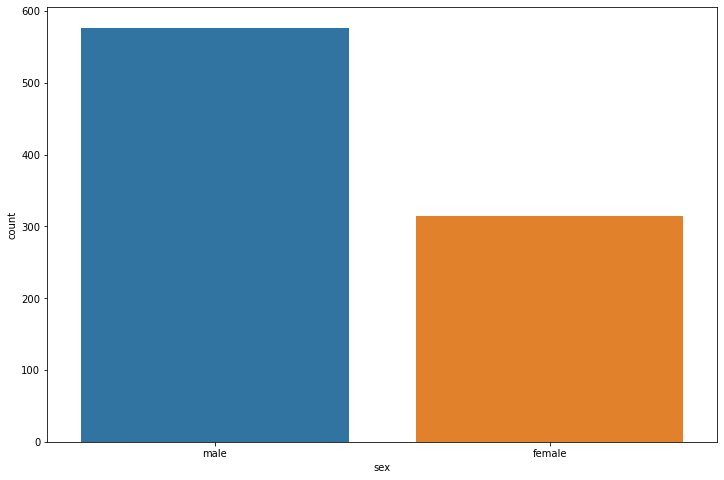

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(data = titanic, x = "sex")
plt.show()

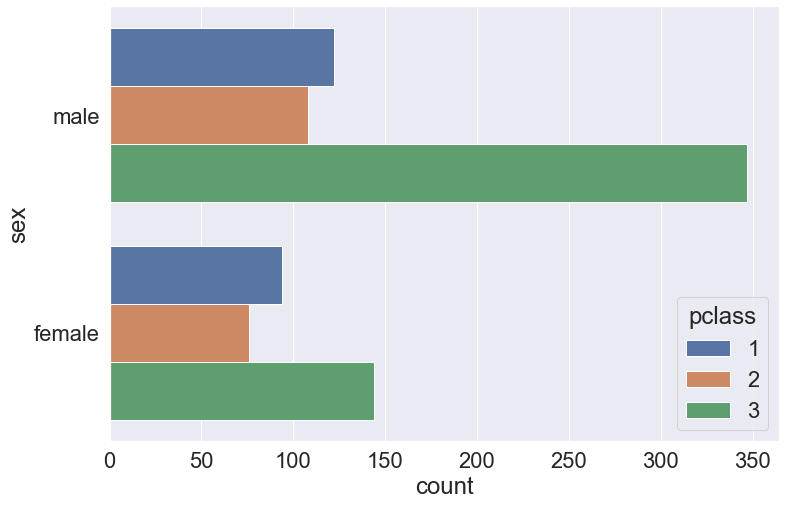

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(data = titanic, y = "sex", hue = "pclass")

#CUSTOMISATION
sns.set_theme(font_scale = 2, palette = "viridis")

plt.show()

## Categorical Plots (working on grouped data)
- eg lets say we want to compare first class male passenger age to first class female passenger age

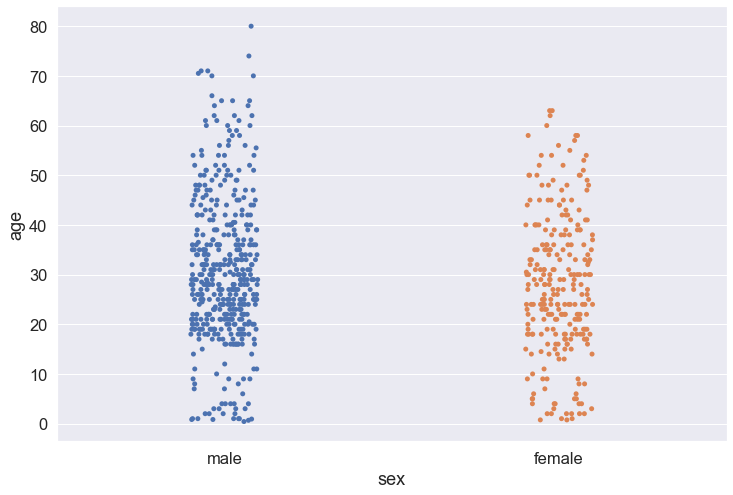

In [24]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
#Draws a scatterplot where one variable is categorical
#unlike scatter in matplot lib where both were numerical
sns.stripplot(data = titanic, x = "sex", y = "age", jitter = True, hue = None, dodge = False)
plt.show()

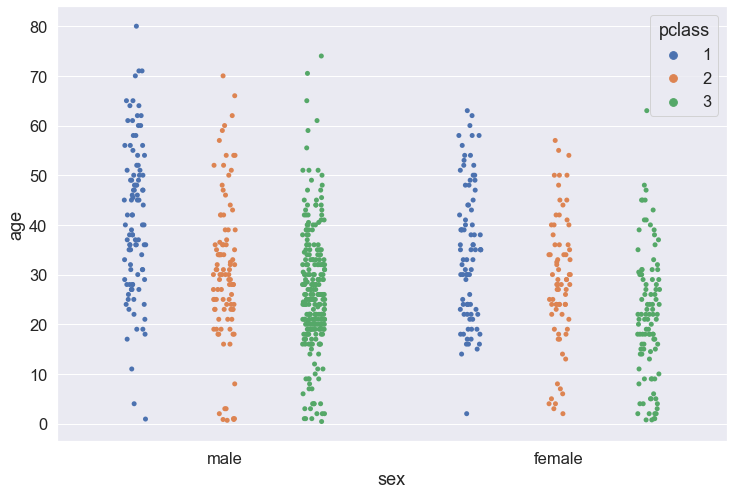

In [32]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
#Draws a scatterplot where one variable is categorical
#unlike scatter in matplot lib where both were numerical
sns.stripplot(data = titanic, x = "sex", y = "age", jitter = True, hue = "pclass", dodge = True)
plt.show()

#seems like first class passengers are older

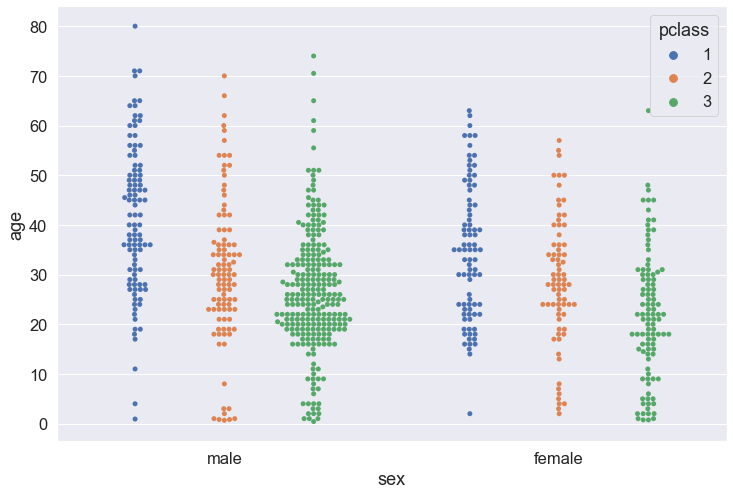

In [42]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
#Draw a categorical scatterplot with non-overlapping points
sns.swarmplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True)
plt.show()

#this makes it even easier to see the age distribution between the 6 groups

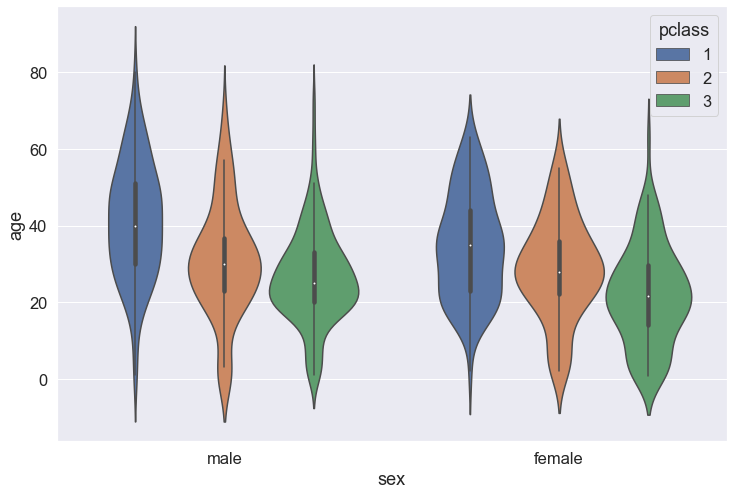

In [44]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
#Draw a categorical scatterplot with non-overlapping points (Draw a combination of boxplot and kernel density estimate)"
sns.violinplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True)
plt.show()

/Users/lucatriglia/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


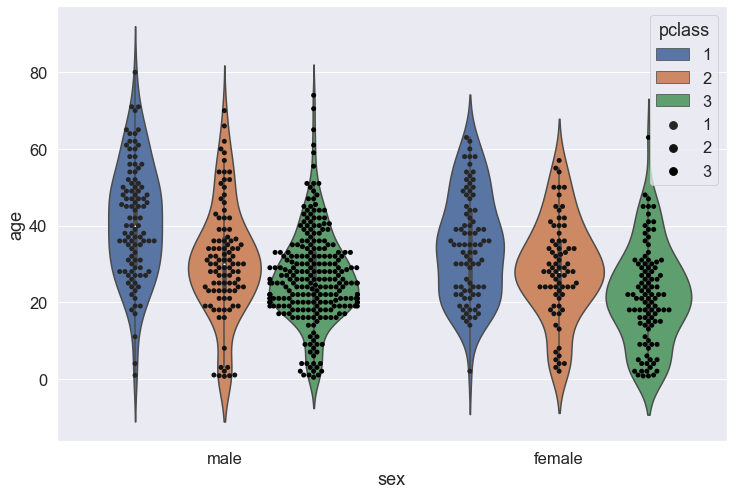

In [62]:
#we can also combine plots!!!
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.violinplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True)
sns.swarmplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True, color = "black")
plt.show()

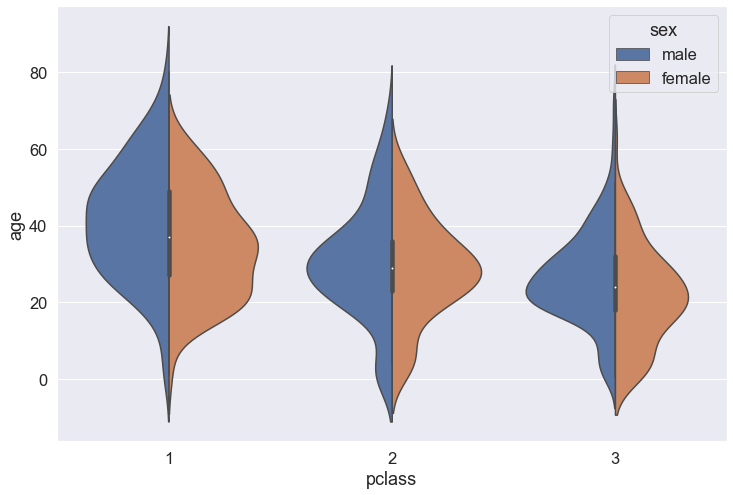

In [58]:
#if we use split = True it combines the violins since there are only 2 categories in hue
#here we are changing the x and y parameters
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.violinplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True, split = True)
plt.show()

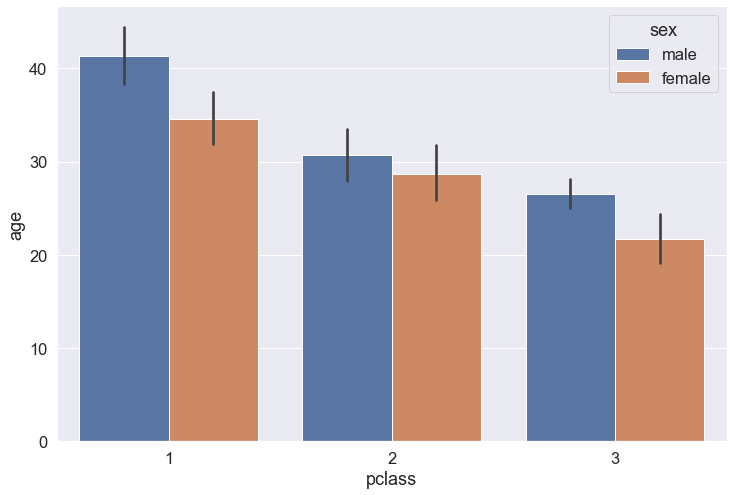

In [66]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True)
plt.show()

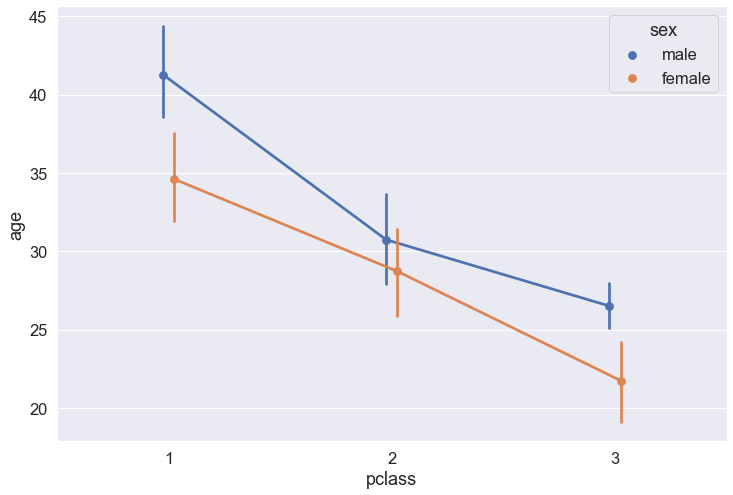

In [68]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.pointplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True)
plt.show()

## Jointplots & Regression Plots

In [71]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [73]:
#what if we want to ask the question of whether older passengers pay more than younger passengers?

<Figure size 864x576 with 0 Axes>

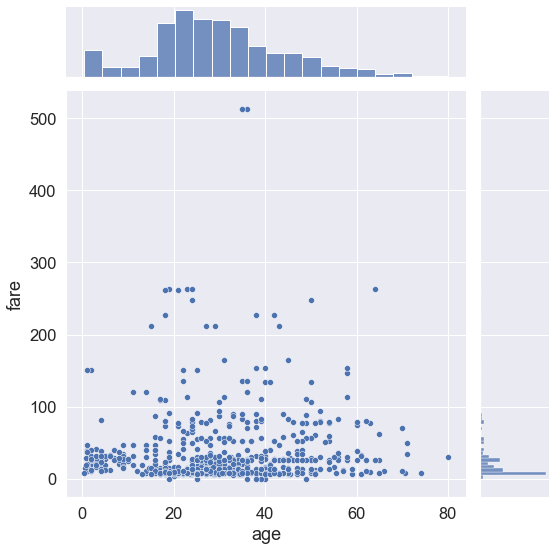

In [79]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "scatter")
plt.show()

<Figure size 864x576 with 0 Axes>

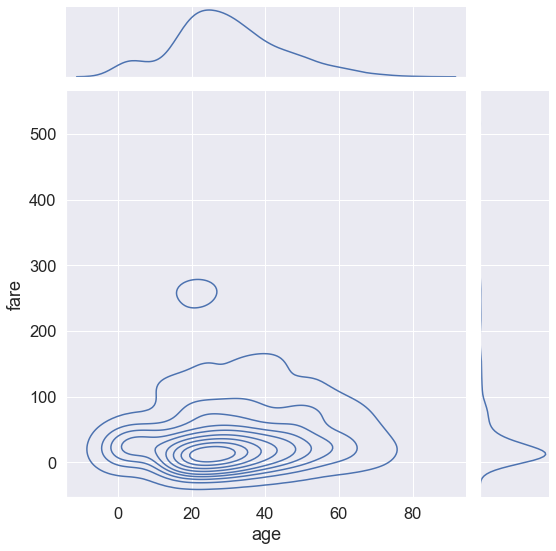

In [83]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "kde")
plt.show()

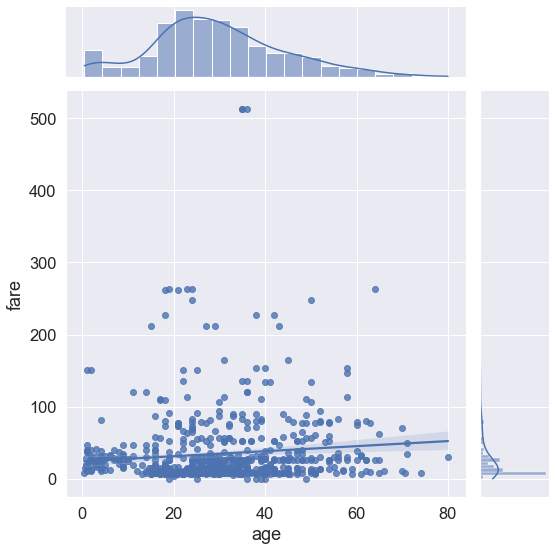

In [91]:
#IS THERE A SIGNIFICANT RELATIONSHIP BETWEEN AGE AND FARE?
#DO OLDER PASSENGERS PAY MORE THAN YOUNGER PASSENGERS?
#lets add a regression line
#the shaded area marks the 95% confidence interval
sns.set(font_scale = 1.5)
sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "reg")
plt.show()

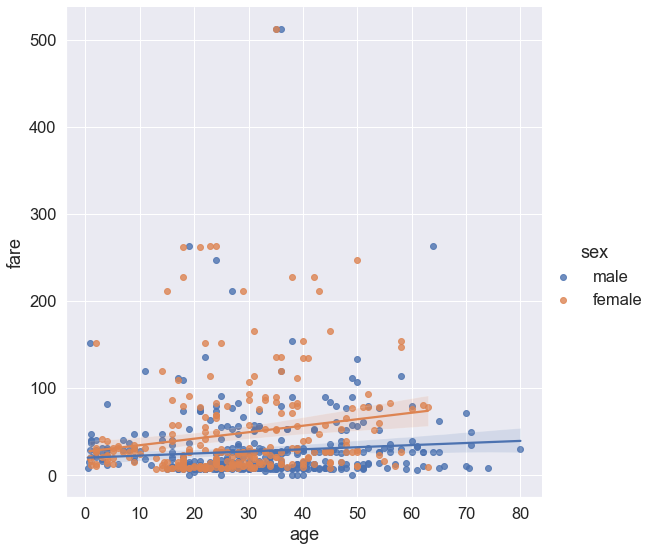

In [116]:
sns.set(font_scale = 1.5)
sns.lmplot(data = titanic, x = "age", y = "fare", aspect = 1, height = 8, hue = "sex", ci = 95)
plt.show()

- lmplot() in Seaborn is used to plot a linear regression model. It shows the relationship between two numerical variables while fitting a regression line.
  
- _ci=95 (Confidence Interval)_

    - This tells Seaborn to compute a 95% confidence interval for the regression line.
    - A confidence interval represents a range where we expect the true regression line to fall 95% of the time if we repeatedly sampled from the population.

- _n_boot=1000 (Bootstrap Sampling)_
    - This tells Seaborn to resample your data 1,000 times to compute the confidence interval.
    - It uses a technique called bootstrapping, which repeatedly samples from your data (with replacement) and fits a regression line each time.
    - The variability of these regression lines helps estimate the uncertainty in the model.

Imagine you’re estimating the average height of students in a school, but you only have data from 30 students. If you take another sample of 30 students, you might get a slightly different average. Instead of collecting more real data (which may not be possible), you simulate new samples by bootstrapping. By taking many resamples, you can estimate how much your sample mean might vary in real-world scenarios. The same logic applies to your regression model—bootstrapping helps estimate how much the regression line might change if we had a different dataset.

## Subplots in Seaborn

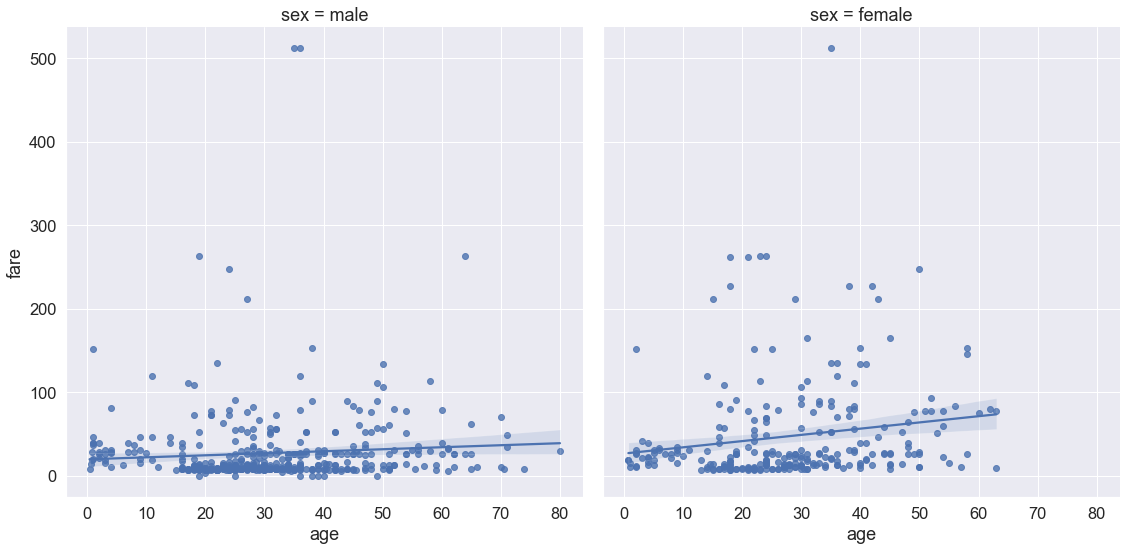

In [119]:
sns.set(font_scale = 1.5)
sns.lmplot(data = titanic, x = "age", y = "fare", aspect = 1, height = 8, hue = "sex", ci = 95)
plt.show()

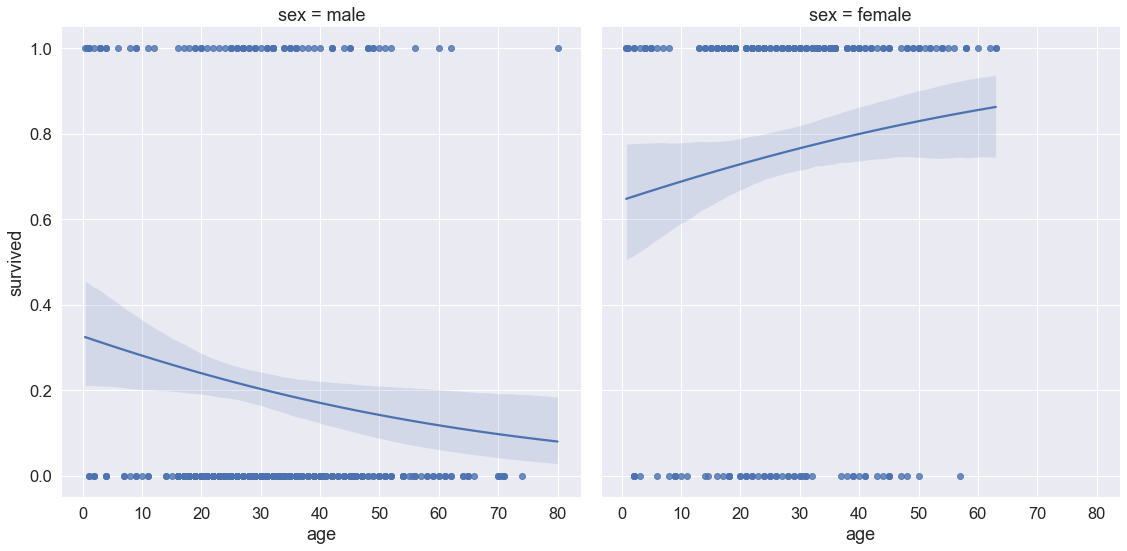

In [132]:
sns.set(font_scale = 1.5)
sns.lmplot(data = titanic, x = "age", y = "survived", aspect = 1, height = 8, logistic = True, col = "sex")
plt.show()

- Since "survived" is a binary variable (0 or 1), you're dealing with logistic regression rather than linear regression.
- By default, sns.lmplot() fits a linear regression model.
- When logistic=True, it instead fits a logistic regression model.
- Logistic regression is better suited for binary outcome variables (like survived = 0 or 1) because it models the probability of an event occurring.
- The shading is wider at the edges because there are fewer data points for extreme ages (very young or very old passengers), leading to higher uncertainty.

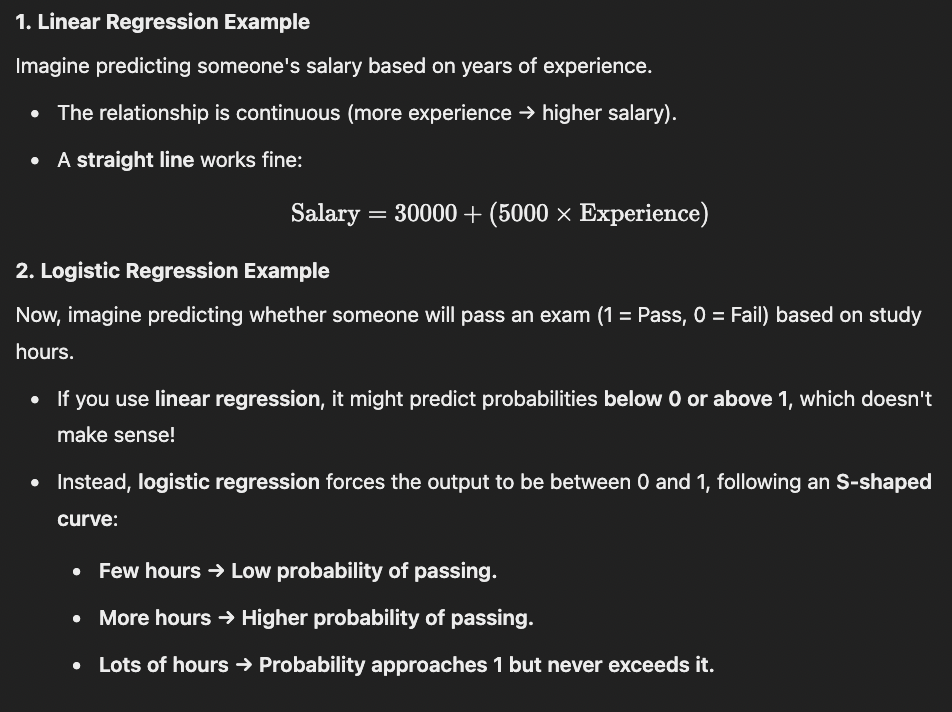

## Heatmaps!!!!

In [135]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [147]:
#very important method (creates another dataframe)
cross_table = pd.crosstab(titanic.sex, titanic.pclass)

In [149]:
#this is the kind of dataframe that is needed for a heatplot!!!

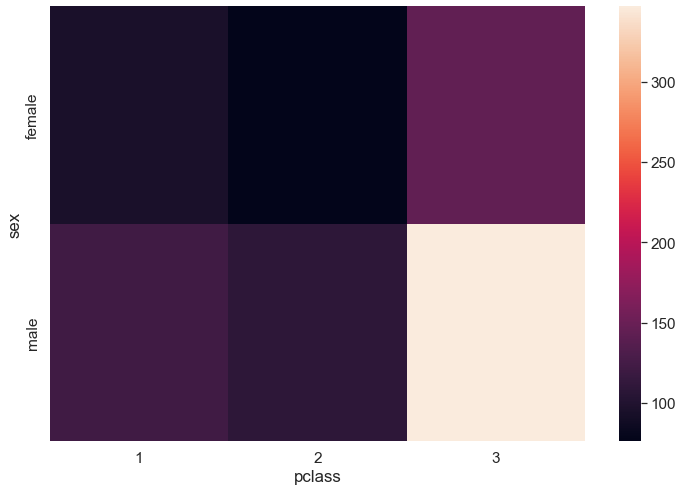

In [161]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(cross_table, annot = False, fmt = "d", cmap = None, vmax = None)
plt.show()

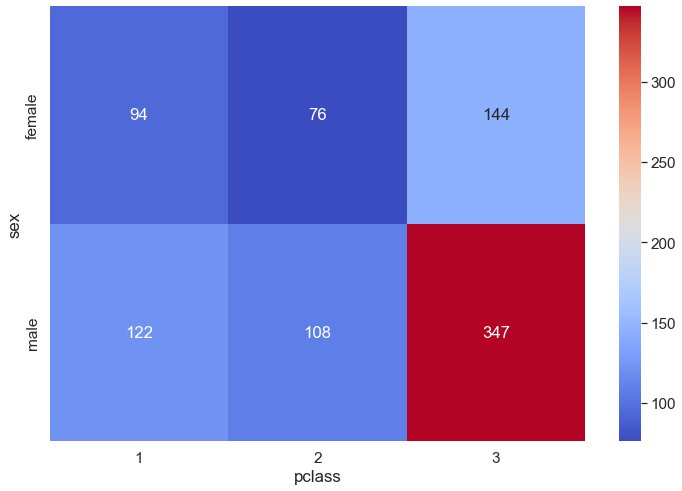

In [159]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(cross_table, annot = True, fmt = "d", cmap = "coolwarm", vmax = None)
plt.show()

In [163]:
#since there is an outlier, we can sex vmax to better differentiate the other colors

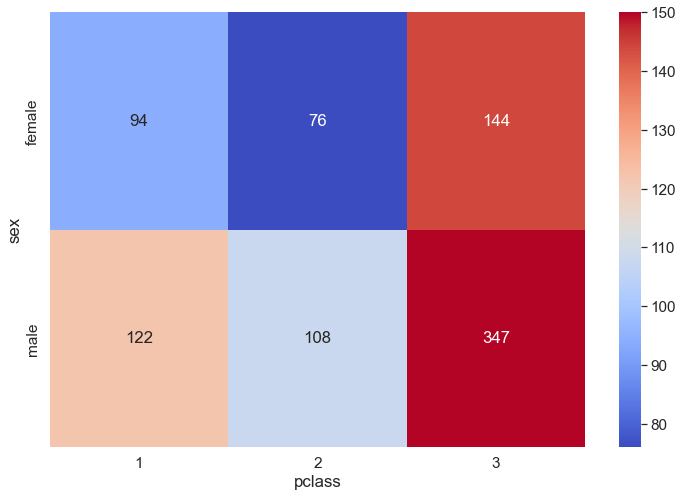

In [165]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(cross_table, annot = True, fmt = "d", cmap = "coolwarm", vmax = 150)
plt.show()

In [183]:
corr_matrix = titanic.corr()

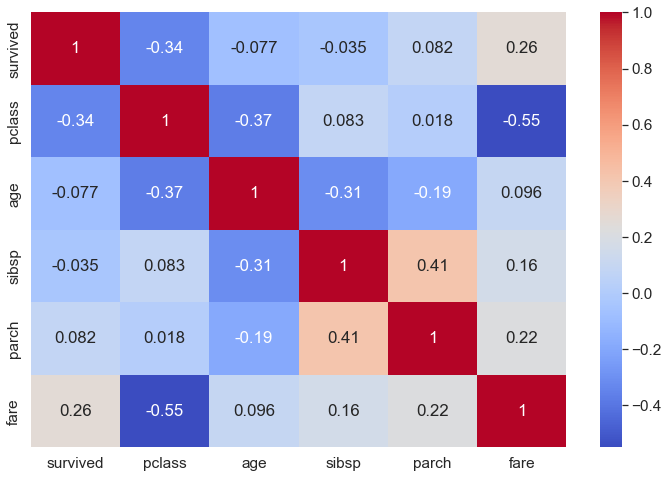

In [185]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()